# Question 1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
from statistics import variance
from fractions import Fraction as fr

import yfinance as yf


from datetime import datetime
import pandas_datareader.data as web

In [2]:
ticker = ['PEP']
df = web.get_data_yahoo(ticker,
start = "2010-01-01",
end = "2022-01-01")

In [3]:
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,PEP,PEP,PEP,PEP,PEP,PEP
Date,,,,,,
2010-01-04,42.175018,61.240002,61.520000,60.639999,61.189999,6585900.0
2010-01-05,42.684654,61.980000,62.099998,60.900002,61.000000,8886000.0
2010-01-06,42.257668,61.360001,62.470001,61.230000,61.990002,9998000.0
2010-01-07,41.989075,60.970001,61.380001,60.529999,61.349998,10792000.0
2010-01-08,41.851334,60.770000,60.820000,60.270000,60.759998,8674700.0


Below is predicting the best days to buy and sell our specific stock (Pepsi) from the year 2000 to 2021. 

[*********************100%***********************]  1 of 1 completed


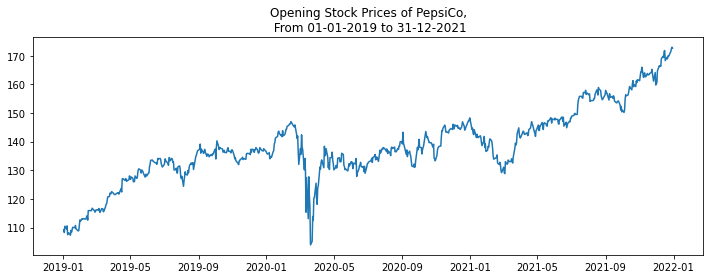

In [4]:
# Select specific date range
# We need to operate on dates ()
df1 = yf.download('PEP', start = '2000-01-01', end = '2021-12-31')
df1['Dates']=df1.index

select = (df1['Dates'] >= '2019-01-01') & (df1['Dates'] <= '2021-12-31')
df_data = df1.loc[select] # Selects only the rows that are True in the select series

df2 = df_data[['Close']].copy()  # only selects the Open column (with the index)

plt.figure(figsize = (12,4))
plt.title('Opening Stock Prices of PepsiCo,\n From 01-01-2019 to 31-12-2021')
plt.plot(df2)
plt.show();
# Note: it is quicker to do: df1.plot(figsize = (12,4), title = 'whatever');b

In [5]:
# Compute the rolling mean and rolling std
df2['rolling_20_mean'] = df2['Close'].rolling(window = 20, min_periods = 10).mean()
df2['rolling_20_std'] = df2['Close'].rolling(window = 20, min_periods = 10).std()

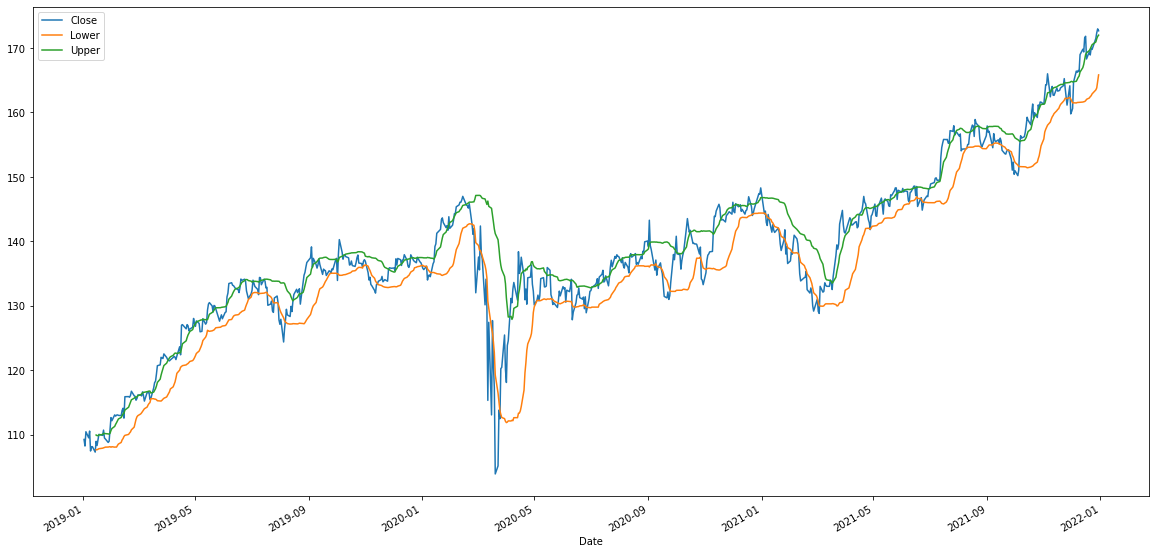

In [6]:
# Bollinger band
# Upper band is rolling 20 days mean + rolling 20 days std
df2['Upper'] = df2['rolling_20_mean'] + df2['rolling_20_std']
df2['Lower'] = df2['rolling_20_mean'] - df2['rolling_20_std']
df2[['Close', 'Lower', 'Upper']].plot(figsize = (20,10), legend = True);

In [7]:
# Best buying and selling days
# This function finds the buy sell schedule for maximum profit
 

def stockBuySell(price, n):
 
    # Prices must be given for at least two days
    if (n == 1):
        return
 
    # Traverse through given price array
    i = 0
    while (i < (n - 1)):
 
        # Find Local Minima
        # Note that the limit is (n-2) as we are
        # comparing present element to the next element
        while ((i < (n - 1)) and
                (price[i + 1] <= price[i])):
            i += 1
 
        # If we reached the end, break
        # as no further solution possible
        if (i == n - 1):
            break
 
        # Store the index of minima
        buy = i
        i += 1
 
        # Find Local Maxima
        # Note that the limit is (n-1) as we are
        # comparing to previous element
        while ((i < n) and (price[i] >= price[i - 1])):
            i += 1
 
        # Store the index of maxima
        sell = i - 1
 
        print("Buy on day: ", buy, "\t",
              "Sell on day: ", sell)
# Necessary code

# Stock prices on consecutive days
price = df2['Close']
n = len(price)
 
# Function call
stockBuySell(price, n)

Buy on day:  1 	 Sell on day:  2
Buy on day:  3 	 Sell on day:  4
Buy on day:  5 	 Sell on day:  7
Buy on day:  8 	 Sell on day:  9
Buy on day:  10 	 Sell on day:  12
Buy on day:  13 	 Sell on day:  14
Buy on day:  17 	 Sell on day:  20
Buy on day:  21 	 Sell on day:  22
Buy on day:  23 	 Sell on day:  25
Buy on day:  27 	 Sell on day:  29
Buy on day:  30 	 Sell on day:  32
Buy on day:  33 	 Sell on day:  35
Buy on day:  38 	 Sell on day:  40
Buy on day:  42 	 Sell on day:  43
Buy on day:  45 	 Sell on day:  46
Buy on day:  47 	 Sell on day:  48
Buy on day:  49 	 Sell on day:  57
Buy on day:  59 	 Sell on day:  60
Buy on day:  64 	 Sell on day:  67
Buy on day:  69 	 Sell on day:  71
Buy on day:  72 	 Sell on day:  74
Buy on day:  75 	 Sell on day:  76
Buy on day:  78 	 Sell on day:  81
Buy on day:  83 	 Sell on day:  84
Buy on day:  86 	 Sell on day:  89
Buy on day:  90 	 Sell on day:  94
Buy on day:  96 	 Sell on day:  97
Buy on day:  100 	 Sell on day:  102
Buy on day:  103 	 Sell on

### Using the function above, we are able to determine what days best we should buy and sell with our given stock

### Now we will get into the returns using our formula

In [8]:
df = df[['Adj Close']]
df.rename(columns={'Adj Close': 'price_t'}, inplace=True)

#df['price_t-1'] = df['price_t'].shift(1)

# Daily Return

In [9]:
df['Daily_return'] = df['price_t']/df['price_t'].shift(1)-1

In [10]:
df['Daily_return_pct'] = df['price_t'].pct_change(1)

In [11]:
df

Attributes,price_t,Daily_return,Daily_return_pct
Symbols,PEP,,
Date,,,
2010-01-04,42.175018,NaN,NaN
2010-01-05,42.684654,0.012084,0.012084
2010-01-06,42.257668,-0.010003,-0.010003
2010-01-07,41.989075,-0.006356,-0.006356
2010-01-08,41.851334,-0.003280,-0.003280
...,...,...,...
2021-12-27,168.043610,0.009954,0.009954
2021-12-28,168.915833,0.005190,0.005190


# Log return

In [12]:
df['Daily_return_log'] = np.log(df['price_t']/df['price_t'].shift(1))
df

Attributes,price_t,Daily_return,Daily_return_pct,Daily_return_log
Symbols,PEP,,,
Date,,,,
2010-01-04,42.175018,NaN,NaN,NaN
2010-01-05,42.684654,0.012084,0.012084,0.012011
2010-01-06,42.257668,-0.010003,-0.010003,-0.010054
2010-01-07,41.989075,-0.006356,-0.006356,-0.006376
2010-01-08,41.851334,-0.003280,-0.003280,-0.003286
...,...,...,...,...
2021-12-27,168.043610,0.009954,0.009954,0.009905
2021-12-28,168.915833,0.005190,0.005190,0.005177


###  There is a very slight difference between a normal daily return and a log normal return

# Cumulative Return

In [13]:
df['Cumulative_return'] = np.cumsum(df['Daily_return'])
df

Attributes,price_t,Daily_return,Daily_return_pct,Daily_return_log,Cumulative_return
Symbols,PEP,,,,
Date,,,,,
2010-01-04,42.175018,NaN,NaN,NaN,NaN
2010-01-05,42.684654,0.012084,0.012084,0.012011,0.012084
2010-01-06,42.257668,-0.010003,-0.010003,-0.010054,0.002081
2010-01-07,41.989075,-0.006356,-0.006356,-0.006376,-0.004276
2010-01-08,41.851334,-0.003280,-0.003280,-0.003286,-0.007556
...,...,...,...,...,...
2021-12-27,168.043610,0.009954,0.009954,0.009905,1.561172
2021-12-28,168.915833,0.005190,0.005190,0.005177,1.566362


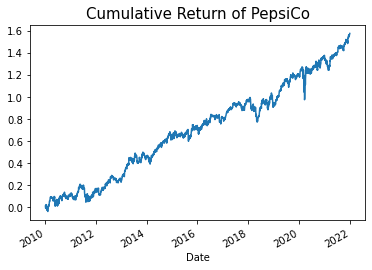

In [14]:
df['Cumulative_return'].plot();
plt.title('Cumulative Return of PepsiCo', size=15, color='black')
plt.style.use('ggplot')

In [15]:
df

Attributes,price_t,Daily_return,Daily_return_pct,Daily_return_log,Cumulative_return
Symbols,PEP,,,,
Date,,,,,
2010-01-04,42.175018,NaN,NaN,NaN,NaN
2010-01-05,42.684654,0.012084,0.012084,0.012011,0.012084
2010-01-06,42.257668,-0.010003,-0.010003,-0.010054,0.002081
2010-01-07,41.989075,-0.006356,-0.006356,-0.006376,-0.004276
2010-01-08,41.851334,-0.003280,-0.003280,-0.003286,-0.007556
...,...,...,...,...,...
2021-12-27,168.043610,0.009954,0.009954,0.009905,1.561172
2021-12-28,168.915833,0.005190,0.005190,0.005177,1.566362


# Questions 2 & 3

In [16]:
tickers = ['AAPL', 'TSM', 'GOOGL','NVDA', 'MSFT']
multpl_stocks = web.get_data_yahoo(tickers,
start = "2010-01-01",
end = "2022-01-01")

In [17]:
multpl_stocks

Attributes   Adj Close                                                  \
Symbols           AAPL         TSM       GOOGL        NVDA        MSFT   
Date                                                                     
2010-01-04    6.526022    7.646094   15.684434    4.243396   23.749813   
2010-01-05    6.537301    7.613081   15.615365    4.305357   23.757484   
2010-01-06    6.433317    7.586669   15.221722    4.332899   23.611689   
2010-01-07    6.421425    7.335761   14.867367    4.247985   23.366131   
2010-01-08    6.464118    7.329159   15.065566    4.257164   23.527273   
...                ...         ...         ...         ...         ...   
2021-12-27  179.586868  120.788132  147.906494  309.240021  340.227112   
2021-12-28  178.551132  120.158104  146.686996  303.014221  339.034882   
2021-12-29  178.640778  119.518242  146.654999  299.806396  339.730377   
2021-12-30  177.465637  118.543663  146.200500  295.659210  337.117401   
2021-12-31  176.838257  118.435371  144.852005  293.910400  334.136902   

Attributes       Close                                                  ...  \
Symbols           AAPL         TSM       GOOGL        NVDA        MSFT  ...   
Date                                                                    ...   
2010-01-04    7.643214   11.580000   15.684434    4.622500   30.950001  ...   
2010-01-05    7.656429   11.530000   15.615365    4.690000   30.959999  ...   
2010-01-06    7.534643   11.490000   15.221722    4.720000   30.770000  ...   
2010-01-07    7.520714   11.110000   14.867367    4.627500   30.450001  ...   
2010-01-08    7.570714   11.100000   15.065566    4.637500   30.660000  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  180.330002  122.699997  147.906494  309.450012  342.450012  ...   
2021-12-28  179.289993  122.059998  146.686996  303.220001  341.250000  ...   
2021-12-29  179.380005  121.410004  146.654999  300.010010  341.950012  ...   
2021-12-30  178.199997  120.419998  146.200500  295.859985  339.320007  ...   
2021-12-31  177.570007  120.309998  144.852005  294.109985  336.320007  ...   

Attributes        Open                                                  \
Symbols           AAPL         TSM       GOOGL        NVDA        MSFT   
Date                                                                     
2010-01-04    7.622500   11.490000   15.689439    4.627500   30.620001   
2010-01-05    7.664286   11.600000   15.695195    4.605000   30.850000   
2010-01-06    7.656429   11.560000   15.662162    4.687500   30.879999   
2010-01-07    7.562500   11.410000   15.250250    4.695000   30.629999   
2010-01-08    7.510714   11.140000   14.814815    4.590000   30.280001   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  121.220001  147.255997  296.600006  335.459991   
2021-12-28  180.160004  123.379997  148.235992  313.119995  343.149994   
2021-12-29  179.330002  121.800003  146.644501  302.730011  341.299988   
2021-12-30  179.470001  121.000000  146.694000  298.269989  341.910004   
2021-12-31  178.089996  121.349998  146.050003  296.739990  338.510010   

Attributes       Volume                                                   
Symbols            AAPL         TSM        GOOGL        NVDA        MSFT  
Date                                                                      
2010-01-04  493729600.0   8096400.0   78169752.0  80020400.0  38409100.0  
2010-01-05  601904800.0  14375900.0  120067812.0  72864800.0  49749600.0  
2010-01-06  552160000.0  13608400.0  158988852.0  64916800.0  58182400.0  
2010-01-07  477131200.0  27346600.0  256315428.0  54779200.0  50559700.0  
2010-01-08  447610800.0  16895300.0  188783028.0  47816800.0  51197400.0  
...                 ...         ...          ...         ...         ...  
2021-12-27   74919600.0   6309900.0   15976000.0  40368600.0  19947000.0  
2021-12-28   79144300.0   6321000.0   18200000.0  42059100.0  1566150

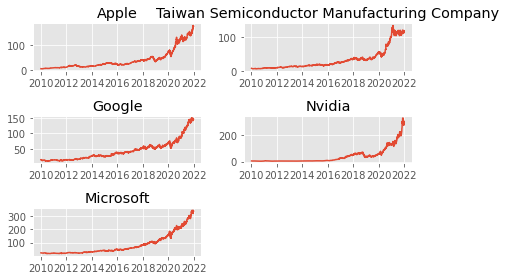

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

ax1.plot(multpl_stocks['Adj Close']['AAPL'])
ax1.set_title("Apple")
ax2.plot(multpl_stocks['Adj Close']['TSM'])
ax2.set_title("Taiwan Semiconductor Manufacturing Company")
ax3.plot(multpl_stocks['Adj Close']['GOOGL'])
ax3.set_title("Google")
ax4.plot(multpl_stocks['Adj Close']['NVDA'])
ax4.set_title("Nvidia")
ax5.plot(multpl_stocks['Adj Close']['MSFT'])
ax5.set_title("Microsoft")
plt.tight_layout()
plt.show()

In [19]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

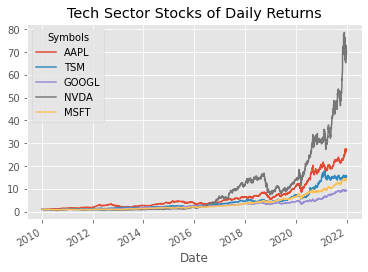

In [20]:
fig = plt.figure()
(multpl_stock_daily_returns + 1).cumprod().plot()
plt.title('Tech Sector Stocks of Daily Returns')
plt.show();

<Figure size 432x288 with 0 Axes>

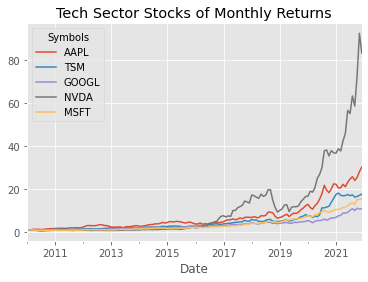

In [21]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.style.use('ggplot')
plt.title('Tech Sector Stocks of Monthly Returns')
plt.show();

# Mean

In [22]:
multpl_stock_monthly_returns.mean()

Symbols
AAPL     0.027073
TSM      0.022512
GOOGL    0.019113
NVDA     0.038375
MSFT     0.021149
dtype: float64

# Standard Deviation

In [23]:
print(str(round(multpl_stock_monthly_returns.std()*100, 2)) +' %')

Symbols
AAPL      7.77
TSM       6.88
GOOGL     6.84
NVDA     12.18
MSFT      6.11
dtype: float64 %


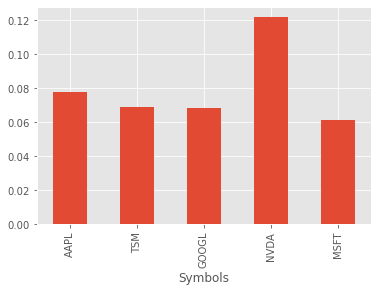

In [24]:
multpl_stock_monthly_returns.std().plot(kind='bar');

# Variance 

In [25]:
print(np.var(multpl_stock_monthly_returns))

Symbols
AAPL     0.005994
TSM      0.004696
GOOGL    0.004641
NVDA     0.014741
MSFT     0.003708
dtype: float64


# Correlation 

In [26]:
multpl_stock_monthly_returns.corr()

Symbols,AAPL,TSM,GOOGL,NVDA,MSFT
Symbols,,,,,
AAPL,1.000000,0.430229,0.385344,0.420878,0.473651
TSM,0.430229,1.000000,0.346168,0.372177,0.442383
GOOGL,0.385344,0.346168,1.000000,0.298770,0.519008
NVDA,0.420878,0.372177,0.298770,1.000000,0.415415
MSFT,0.473651,0.442383,0.519008,0.415415,1.000000


# Covariance 

In [27]:
multpl_stock_monthly_returns.cov()

Symbols,AAPL,TSM,GOOGL,NVDA,MSFT
Symbols,,,,,
AAPL,0.006036,0.002299,0.002047,0.003984,0.002249
TSM,0.002299,0.004729,0.001627,0.003118,0.001859
GOOGL,0.002047,0.001627,0.004674,0.002489,0.002168
NVDA,0.003984,0.003118,0.002489,0.014845,0.003093
MSFT,0.002249,0.001859,0.002168,0.003093,0.003734


# GaussianMixture 

In [28]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(multpl_stocks)
gmm.fit(multpl_stocks)

GaussianMixture(n_components=3)

In [29]:
gmm = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans')
gmm.fit(multpl_stocks)
cov = []
means = []
for i in range(gmm.n_components):
    cov.append(gmm.covariances_[i])
    means.append(gmm.means_[i])


In [30]:
means[0]

array([2.44030741e+01, 1.91097929e+01, 3.30314289e+01, 9.05850766e+00,
       4.37070784e+01, 2.67219067e+01, 2.36794721e+01, 3.30314289e+01,
       9.27767435e+00, 4.89610756e+01, 2.69372751e+01, 2.38551097e+01,
       3.32929139e+01, 9.37492797e+00, 4.93322928e+01, 2.64921323e+01,
       2.34809495e+01, 3.27557231e+01, 9.15279750e+00, 4.85364782e+01,
       2.67141220e+01, 2.36654362e+01, 3.30432228e+01, 9.25938291e+00,
       4.89282521e+01, 2.00351514e+08, 9.76507230e+06, 4.51880435e+07,
       3.48338042e+07, 3.29325265e+07])

In [31]:
cov[0]

array([[ 1.98993957e+01,  1.30121015e+01,  1.26583773e+01,
         1.79393117e+01,  2.64929923e+01,  2.03026771e+01,
         1.40103301e+01,  1.26583773e+01,  1.79948164e+01,
         2.56480101e+01,  2.03596570e+01,  1.40691406e+01,
         1.26012674e+01,  1.81628247e+01,  2.56242449e+01,
         2.01540415e+01,  1.39063064e+01,  1.26402377e+01,
         1.77371331e+01,  2.55795438e+01,  2.02295755e+01,
         1.39894009e+01,  1.25286777e+01,  1.79447274e+01,
         2.55668469e+01, -2.06168874e+08, -3.19249088e+06,
        -4.77832073e+07,  1.42308022e+07, -1.47193256e+07],
       [ 1.30121015e+01,  1.62211890e+01,  1.92180565e+01,
         2.55633015e+01,  3.22645626e+01,  1.23320185e+01,
         1.71215656e+01,  1.92180565e+01,  2.56906063e+01,
         3.10378103e+01,  1.22476517e+01,  1.71400406e+01,
         1.91571635e+01,  2.59365123e+01,  3.09529304e+01,
         1.23097211e+01,  1.70193926e+01,  1.92006494e+01,
         2.53112089e+01,  3.10059323e+01,  1.22086203e+

# KMeans

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=0).fit(multpl_stocks)

In [33]:
km.cluster_centers_

array([[1.23962234e+01, 9.49134265e+00, 1.55305576e+01, 3.27081644e+00,
        2.28372086e+01, 1.44379115e+01, 1.32306800e+01, 1.55305576e+01,
        3.55170999e+00, 2.85139200e+01, 1.46319886e+01, 1.33790000e+01,
        1.57062748e+01, 3.62084000e+00, 2.88116400e+01, 1.42301543e+01,
        1.31003200e+01, 1.53731826e+01, 3.49265001e+00, 2.82354000e+01,
        1.44387686e+01, 1.32482400e+01, 1.55502696e+01, 3.56159000e+00,
        2.85342001e+01, 6.96350629e+08, 1.35341112e+07, 1.30357927e+08,
        6.69141424e+07, 6.01931188e+07],
       [2.69701911e+01, 2.02242229e+01, 3.14188577e+01, 1.59008169e+01,
        5.11864469e+01, 2.91439628e+01, 2.43543427e+01, 3.14188577e+01,
        1.61498228e+01, 5.63826736e+01, 2.95556631e+01, 2.46087001e+01,
        3.17836612e+01, 1.65326958e+01, 5.70997046e+01, 2.87594503e+01,
        2.41100887e+01, 3.10658936e+01, 1.58008383e+01, 5.56643426e+01,
        2.91862529e+01, 2.43676219e+01, 3.14644266e+01, 1.62057977e+01,
        5.64071050e+01,

In [34]:
km.fit_predict(multpl_stocks)

array([2, 0, 2, ..., 3, 3, 3], dtype=int32)

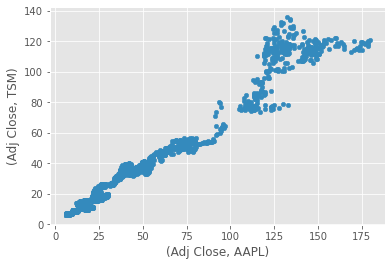

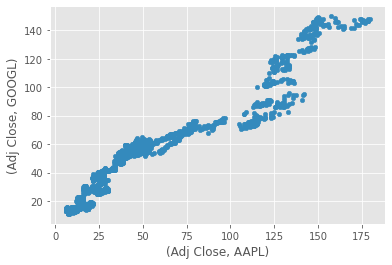

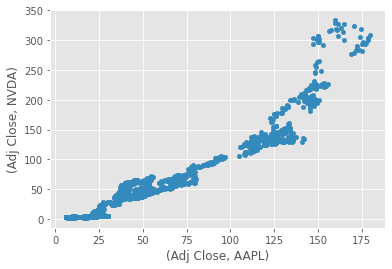

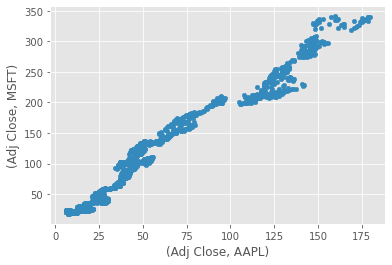

In [35]:
multpl_stocks.iloc[:, : 5].plot.scatter(x=0, y=1);
multpl_stocks.iloc[:, : 5].plot.scatter(x=0, y=2);
multpl_stocks.iloc[:, : 5].plot.scatter(x=0, y=3);
multpl_stocks.iloc[:, : 5].plot.scatter(x=0, y=4);

### Within the technology sector, we see a very reoccuring pattern in the 5 stocks we choose. 